In [1]:
import numpy as np
#Numpy, Python programlama dilinde sayısal hesaplamalar için kullanılan bir kütüphanedir.
import pandas as pd
#Pandas, Python programlama dilinde veri analizi ve veri manipülasyonu için kullanılan bir kütüphanedir. 
import matplotlib.pyplot as plt
#Matplotlib, Python programlama dilinde veri görselleştirme için kullanılan bir kütüphanedir.
from mpl_toolkits.mplot3d import Axes3D
#Bu araç seti, Axes3D adlı sınıfı içerir ve bu sınıf, 3 boyutlu uzayda grafikler çizmek için kullanılır.
from sklearn.preprocessing import StandardScaler
#Bu sınıf, veri ön işleme aşamasında kullanılan bir standartlaştırma yöntemidir.
import os 
#Python'da hazır olarak gelen , dosya ve dizinlerde kolaylıkla işlemler yapmamızı sağlayan bir modüldür
import seaborn as sns
#seaborn, yüksek seviye bir grafik çizim kütüphanesidir ve daha estetik ve bilgilendirici grafikler oluşturmak için kullanılır.

In [2]:
df=pd.read_csv("https://gist.githubusercontent.com/Ironraptor3/34f3938c703111353ee5f28cc9b29d68/raw/5c57e51dbc550a141a44f93028104ffce6281624/vgsales.csv")
#Data github sitesinden read_csv komutu ile çağırılır. 

In [3]:
df.sample(5)
#Sample komutu data içerisinden parantez içindeki sayı kadar satırı listeler.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9208,10541,Yggdra Union: We'll Never Fight Alone,PSP,2008,Role-Playing,Sting,0.05,0.00,0.04,0.01,0.10
3110,6500,Star Wars: Bounty Hunter,GC,2002,Shooter,LucasArts,0.20,0.05,0.00,0.01,0.26
4609,3778,Blitz: The League,XB,2004,Sports,Midway Games,0.40,0.11,0.00,0.02,0.53
5210,1107,Dragon Ball Z: Budokai Tenkaichi,PS2,2005,Fighting,Atari,0.96,0.12,0.54,0.04,1.66
11317,2250,NCAA Football 11,X360,2010,Sports,Electronic Arts,0.86,0.00,0.00,0.06,0.92


In [4]:
df.isna().sum()
# isna veya isnull komutu data içerisindeki nan yani eksik, boş, hatalı verileri listeler.

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [5]:
df.dropna(inplace=True)
# dropna data içerisindeki nan değerler olan satırları kaldırır.

In [6]:
df.isnull().sum()
# burada görüldüğü gibi işlem sonrasında datada nan değer kalmamıştır. 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16314,16477,Total War Attila: Tyrants & Kings,PC,2016,Strategy,Koch Media,0.00,0.01,0.00,0.0,0.01
16315,16533,Sébastien Loeb Rally Evo,XOne,2016,Racing,Milestone S.r.l,0.00,0.01,0.00,0.0,0.01
16316,16534,Hitman (2016),XOne,2016,Action,Square Enix,0.00,0.01,0.00,0.0,0.01
16317,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
16318,16558,Codename: Panzers Complete Collection,PC,2016,Strategy,Nordic Games,0.00,0.01,0.00,0.0,0.01
16319,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.0,0.01
16320,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.0,0.01
16321,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.0,0.01
16322,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.0,0.01
16323,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.0,0.01


In [8]:
df2 =df.sort_values(by='Global_Sales',ascending=False)

In [9]:
df2.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8322,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
9750,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
188,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6113,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
6114,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9751,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
108,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [10]:
df['Genre'].unique()


array(['Shooter', 'Misc', 'Fighting', 'Sports', 'Action', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [11]:
df["Platform"].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU',
       'PS4', 'XOne'], dtype=object)

In [12]:
df['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [13]:
df['Publisher'].unique()

array(['Atari', 'Activision', 'Parker Bros.', 'Imagic', 'Coleco',
       'Mystique', '20th Century Fox Video Games', 'Men-A-Vision',
       'Tigervision', 'Mattel Interactive', 'Data Age', 'Starpath Corp.',
       'Unknown', 'Taito', 'Quelle', 'Universal Gamex',
       'Wizard Video Games', 'CPG Products', 'Answer Software', 'Sega',
       'ITT Family Games', 'CBS Electronics', 'Bomb',
       'Avalon Interactive', 'Nintendo', 'Namco Bandai Games',
       'Hudson Soft', 'Capcom', 'Mycom', 'Konami Digital Entertainment',
       'Enix Corporation', 'SquareSoft', 'Maxis', 'Palcom',
       'HAL Laboratory', 'Square', 'Human Entertainment', 'Banpresto',
       'BPS', 'Angel Studios', 'Tecmo Koei', 'Culture Brain', 'Imagineer',
       'Epoch', 'Kemco', 'Arena Entertainment', 'Virgin Interactive',
       'Takara', 'Ocean', 'Video System', 'ChunSoft', 'Electronic Arts',
       'id Software', 'New World Computing', 'Acclaim Entertainment',
       'Laguna', 'Sammy Corporation', 'Hect', 'SNK', 'T&

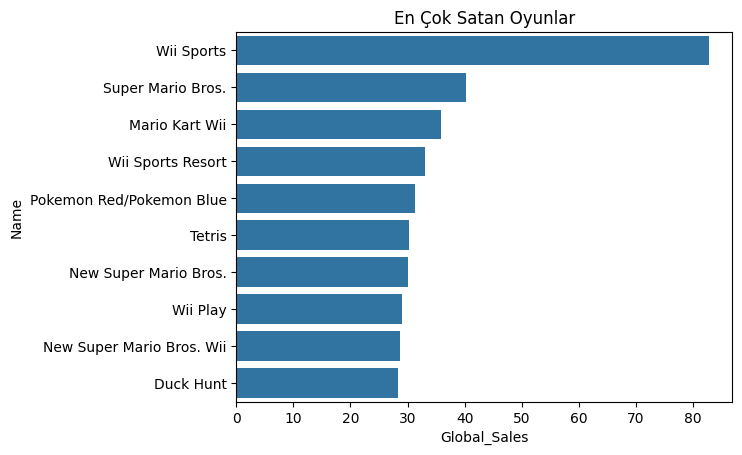

In [14]:
sns.barplot(y=df2.Name.head(10),x=df2.Global_Sales.head(10));
plt.title("En Çok Satan Oyunlar");

In [15]:
top_10_na_sales = df[['Name', 'NA_Sales']].sort_values(by='NA_Sales', ascending=False).head(10)

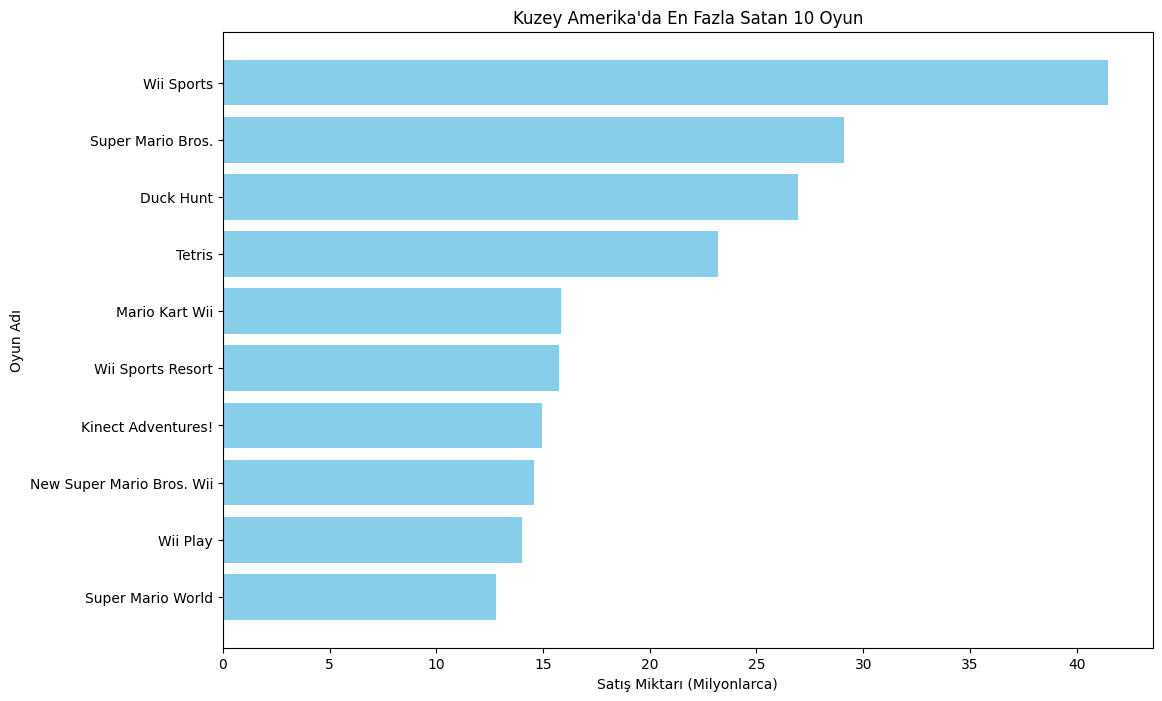

In [16]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_na_sales['Name'], top_10_na_sales['NA_Sales'], color='skyblue')
plt.title('Kuzey Amerika\'da En Fazla Satan 10 Oyun')
plt.xlabel('Satış Miktarı (Milyonlarca)')
plt.ylabel('Oyun Adı')
plt.gca().invert_yaxis()  
plt.show()

In [17]:
top_10_eu_sales = df[['Name', 'EU_Sales']].sort_values(by='EU_Sales', ascending=False).head(10)

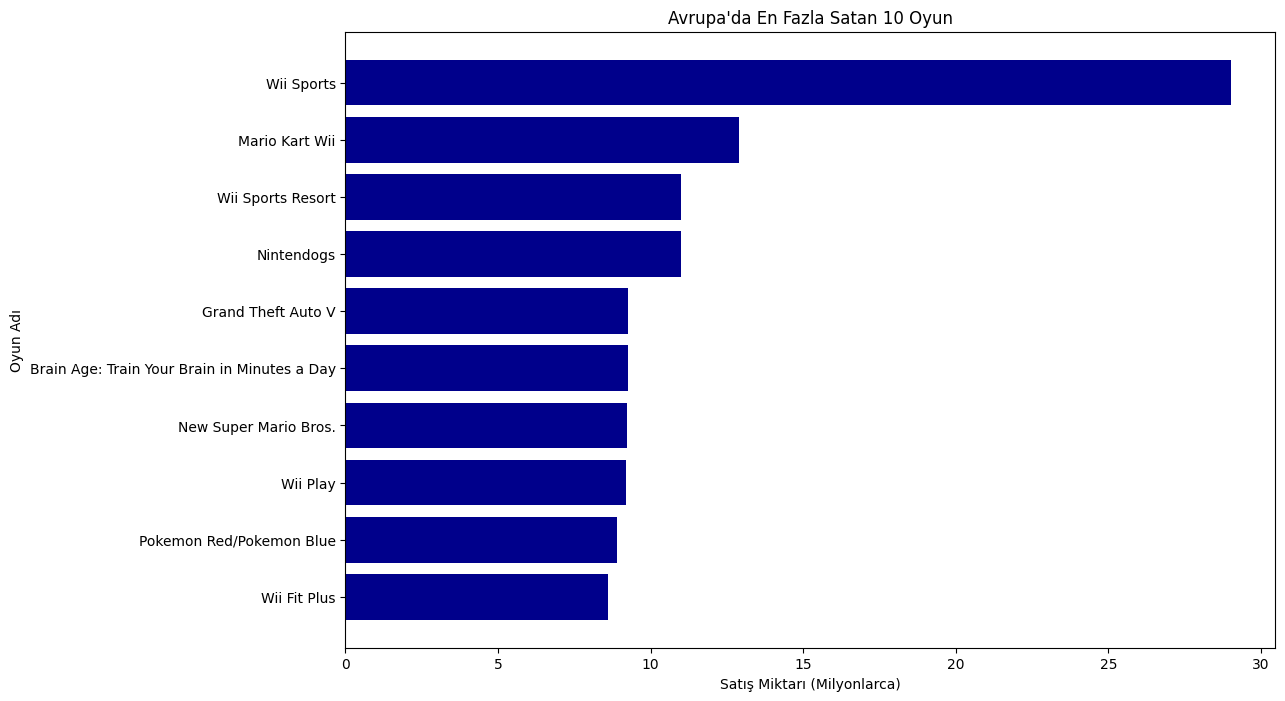

In [18]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_eu_sales['Name'], top_10_eu_sales['EU_Sales'], color='darkblue')
plt.title('Avrupa\'da En Fazla Satan 10 Oyun')
plt.xlabel('Satış Miktarı (Milyonlarca)')
plt.ylabel('Oyun Adı')
plt.gca().invert_yaxis()  
plt.show()

In [19]:
top_10_jp_sales = df[['Name', 'JP_Sales']].sort_values(by='JP_Sales', ascending=False).head(10)

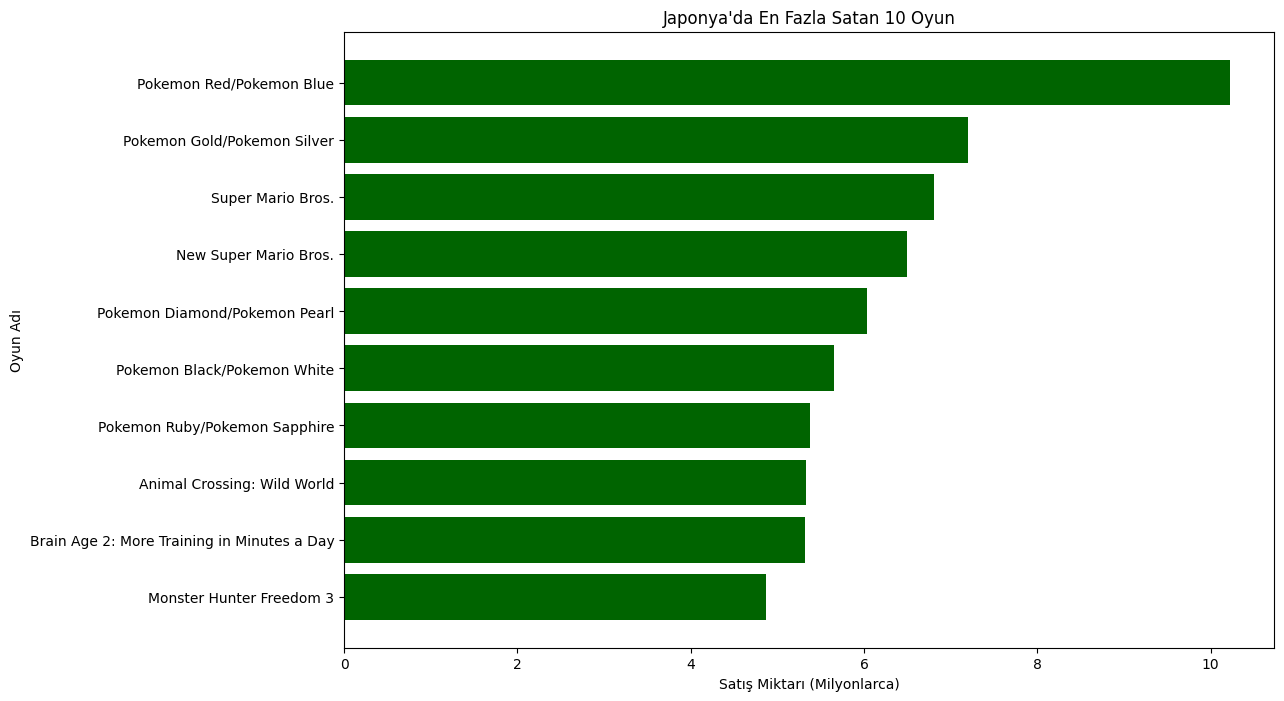

In [20]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_jp_sales['Name'], top_10_jp_sales['JP_Sales'], color='darkgreen')
plt.title('Japonya\'da En Fazla Satan 10 Oyun')
plt.xlabel('Satış Miktarı (Milyonlarca)')
plt.ylabel('Oyun Adı')
plt.gca().invert_yaxis()  
plt.show()

In [21]:
top_10_other_sales = df[['Name', 'Other_Sales']].sort_values(by='Other_Sales', ascending=False).head(10)

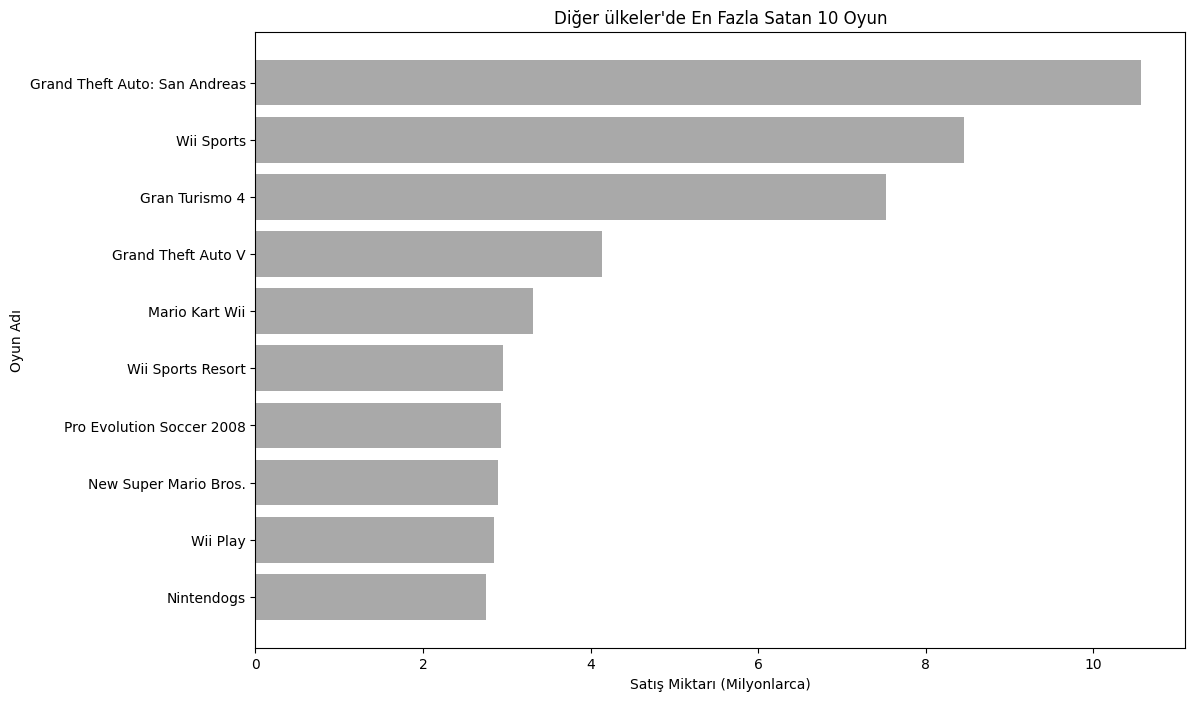

In [22]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_other_sales['Name'], top_10_other_sales['Other_Sales'], color='darkgrey')
plt.title('Diğer ülkeler\'de En Fazla Satan 10 Oyun')
plt.xlabel('Satış Miktarı (Milyonlarca)')
plt.ylabel('Oyun Adı')
plt.gca().invert_yaxis()  
plt.show()

In [23]:
genre_sales=df.groupby(["Genre"])["Global_Sales"].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'Türüne Göre Satış Oranları')

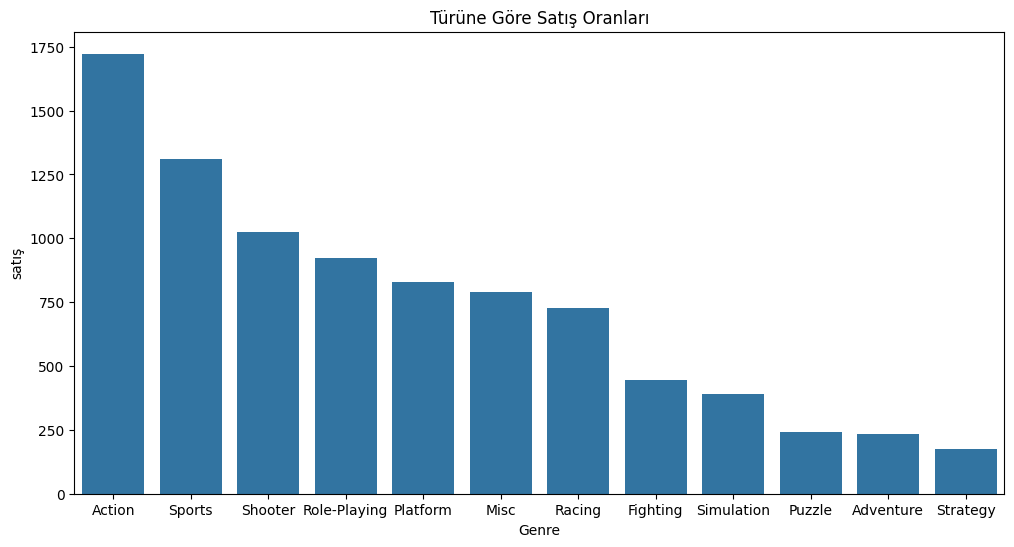

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index,y=genre_sales)
plt.ylabel("satış")
plt.title("Türüne Göre Satış Oranları")

In [25]:
action_games = df[df['Genre'] == 'Action']

In [26]:
sales_per_year_action = action_games.groupby('Year')['Global_Sales'].sum().reset_index()

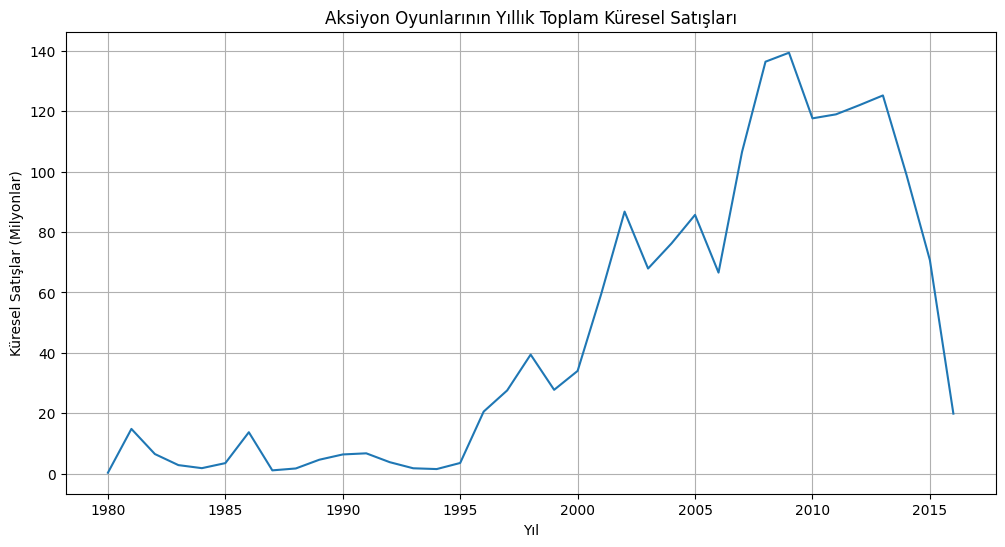

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_year_action, x='Year', y='Global_Sales')
plt.title('Aksiyon Oyunlarının Yıllık Toplam Küresel Satışları')
plt.xlabel('Yıl')
plt.ylabel('Küresel Satışlar (Milyonlar)')
plt.grid(True)
plt.show()

In [28]:
sports_games = df[df['Genre'] == 'Sports']

In [29]:
sales_per_year_sports = sports_games.groupby('Year')['Global_Sales'].sum().reset_index()

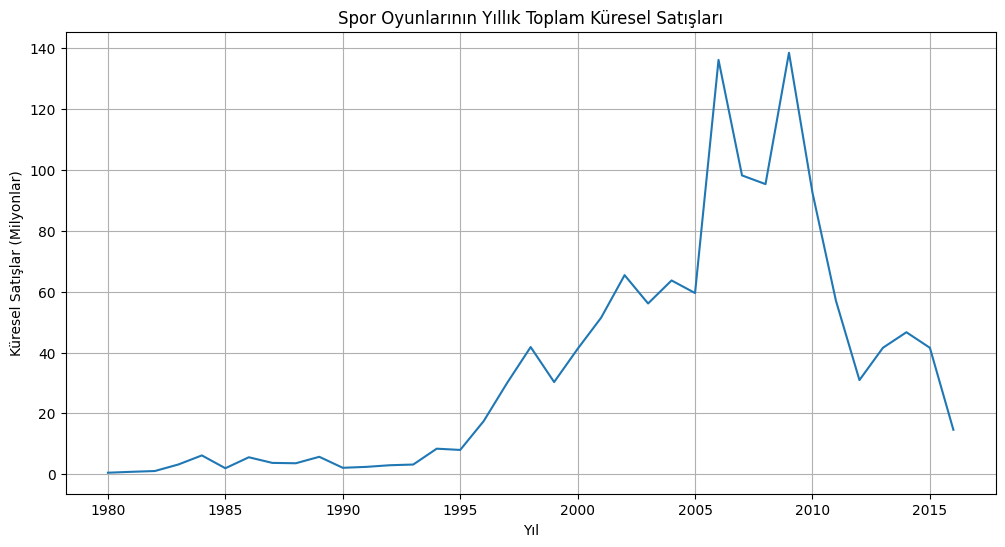

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_year_sports, x='Year', y='Global_Sales')
plt.title('Spor Oyunlarının Yıllık Toplam Küresel Satışları')
plt.xlabel('Yıl')
plt.ylabel('Küresel Satışlar (Milyonlar)')
plt.grid(True)
plt.show()

In [31]:
platform_racing_df = df[(df['Genre'] == 'Platform') | (df['Genre'] == 'Racing')]


In [32]:
sales_by_year = platform_racing_df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()


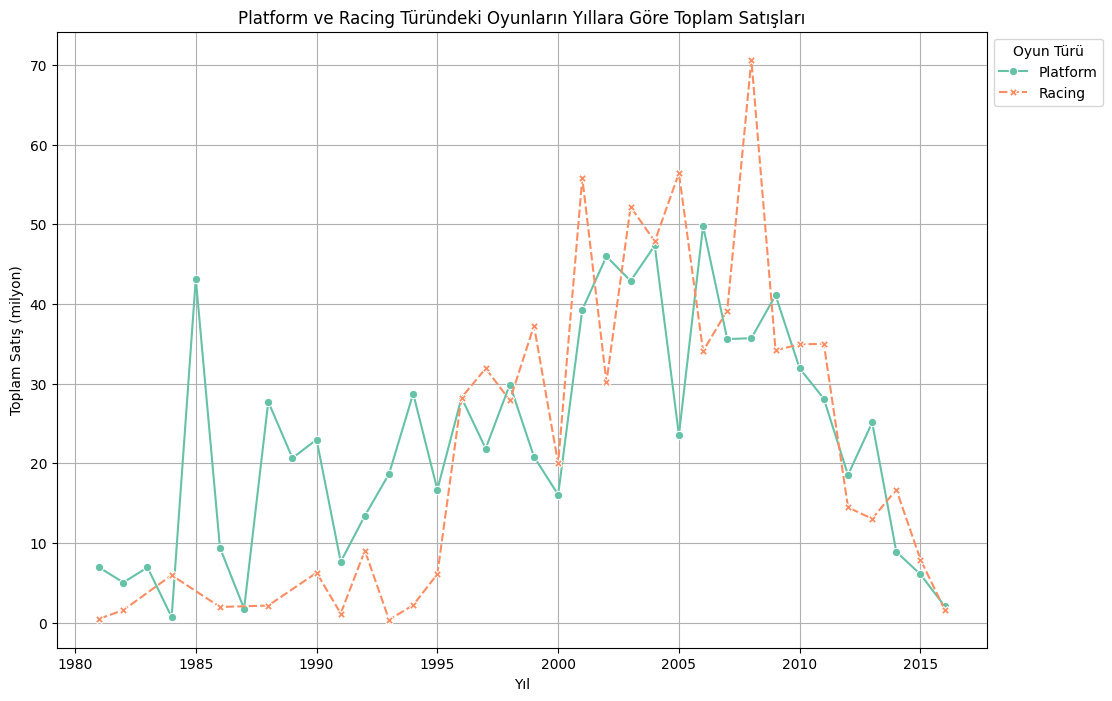

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', hue='Genre', style='Genre', markers=True, palette='Set2')
plt.title('Platform ve Racing Türündeki Oyunların Yıllara Göre Toplam Satışları')
plt.xlabel('Yıl')
plt.ylabel('Toplam Satış (milyon)')
plt.legend(title='Oyun Türü', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [34]:
data=genre_sales
labels=[]
for x in genre_sales.index:
    labels.append(x)

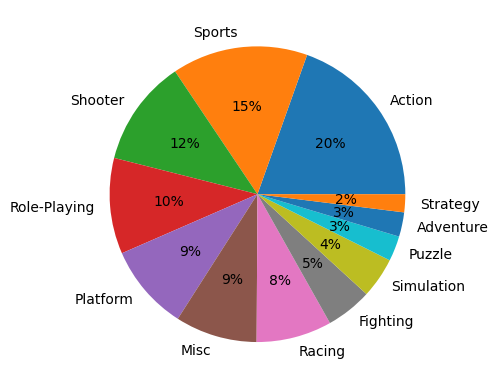

<Figure size 1200x700 with 0 Axes>

In [35]:
plt.pie(data,labels=labels, autopct='%.0f%%')
plt.figure(figsize=(12,7))
plt.show();


In [36]:
#En büyük 10 yayıcıyı gösteriyoruz
df['Publisher'].value_counts().head(10)

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
Name: count, dtype: int64

In [37]:
#Burda ise bu en büyük 10 yayıncının marketin yüzde kaçını oluşturduğuna bakıyoruz
publishers = (df['Publisher'].value_counts() / len(df)) * 100
publishers.head(10)

Publisher
Electronic Arts                 8.220776
Activision                      5.930747
Namco Bandai Games              5.697446
Ubisoft                         5.636051
Konami Digital Entertainment    5.052800
THQ                             4.371316
Nintendo                        4.273084
Sony Computer Entertainment     4.187132
Sega                            3.867878
Take-Two Interactive            2.529470
Name: count, dtype: float64

In [38]:
#Burada bu ilk 10 yayıncının bu markette toplam  yüzde kaçına denk olduklarını hesaplıyoruz 
publishers.head(10).cumsum()

Publisher
Electronic Arts                  8.220776
Activision                      14.151523
Namco Bandai Games              19.848969
Ubisoft                         25.485020
Konami Digital Entertainment    30.537819
THQ                             34.909136
Nintendo                        39.182220
Sony Computer Entertainment     43.369352
Sega                            47.237230
Take-Two Interactive            49.766699
Name: count, dtype: float64

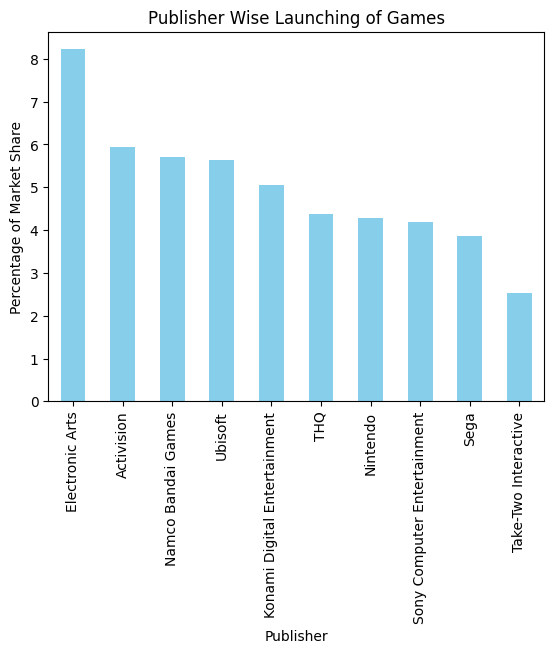

In [39]:
publishers.head(10).plot(kind='bar', color='skyblue')
plt.title("Publisher Wise Launching of Games")
plt.ylabel('Percentage of Market Share')
plt.show()

In [40]:
Top_platforms=df.groupby(["Platform"])["Global_Sales"].sum().sort_values(ascending=False).head(10)

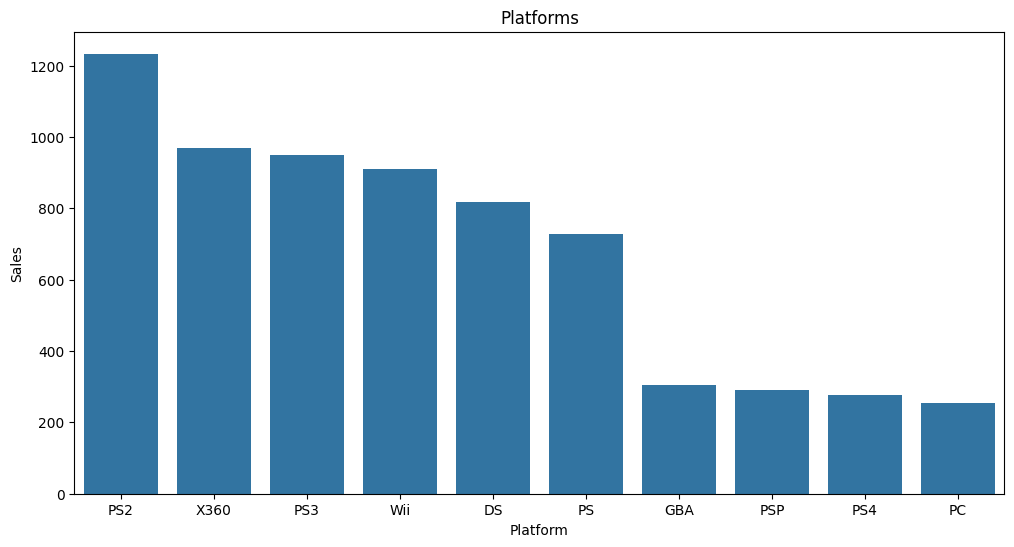

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=Top_platforms.index,y=Top_platforms)
plt.ylabel("Sales")
plt.title("Platforms");

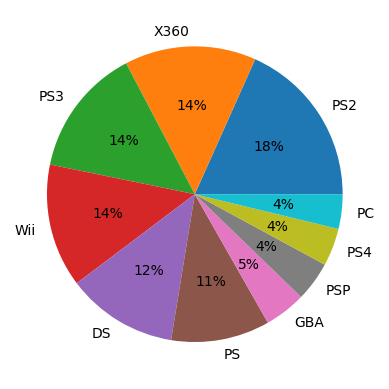

<Figure size 1200x700 with 0 Axes>

In [42]:
plt.pie(Top_platforms,labels=Top_platforms.index, autopct='%.0f%%');
plt.figure(figsize=(12,7));

In [43]:
na_platform_sales = df.groupby('Platform')['NA_Sales'].sum()


In [51]:
sales_per_year=df.groupby('Year')['Global_Sales'].sum()

In [52]:
platform_counts = df['Platform'].value_counts()


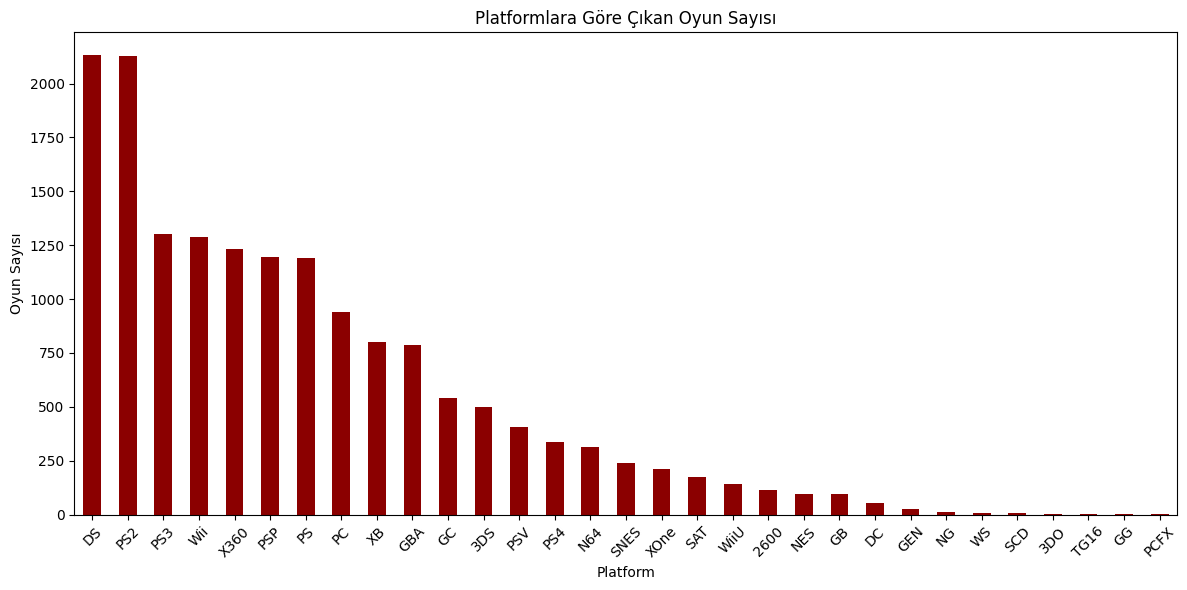

In [53]:
plt.figure(figsize=(12, 6))
platform_counts.plot(kind='bar', color='darkred')
plt.title('Platformlara Göre Çıkan Oyun Sayısı')
plt.xlabel('Platform')
plt.ylabel('Oyun Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

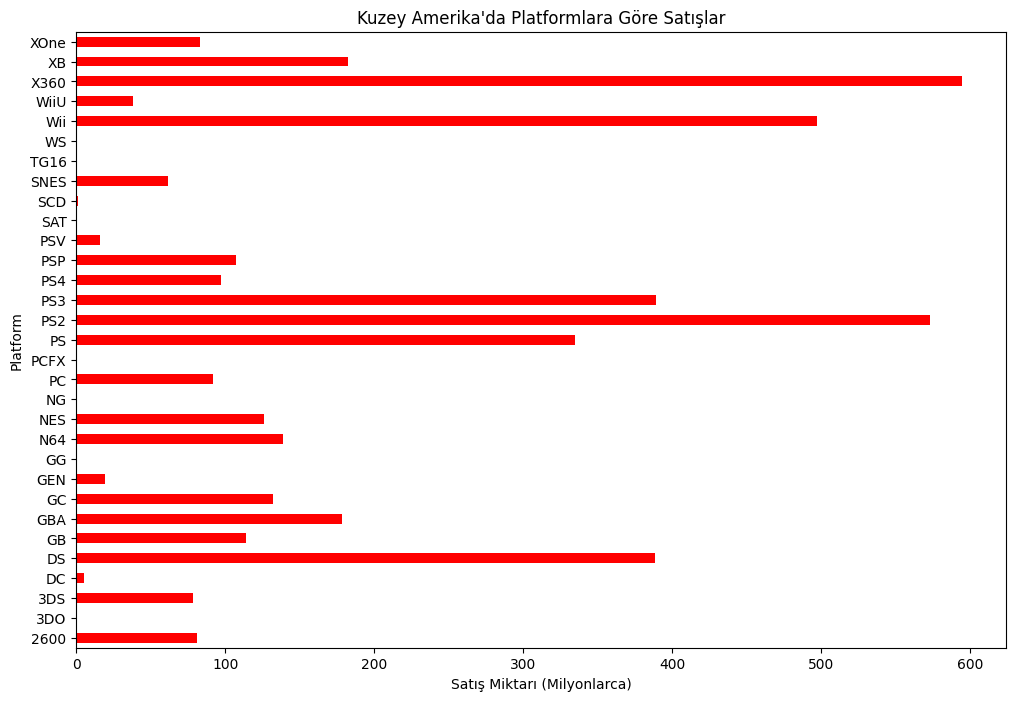

In [44]:
na_platform_sales.plot(kind='barh', color='red', figsize=(12, 8))
plt.title('Kuzey Amerika\'da Platformlara Göre Satışlar')
plt.xlabel('Satış Miktarı (Milyonlarca)')
plt.ylabel('Platform')
plt.show()

In [45]:
eu_platform_sales = df.groupby('Platform')['EU_Sales'].sum()

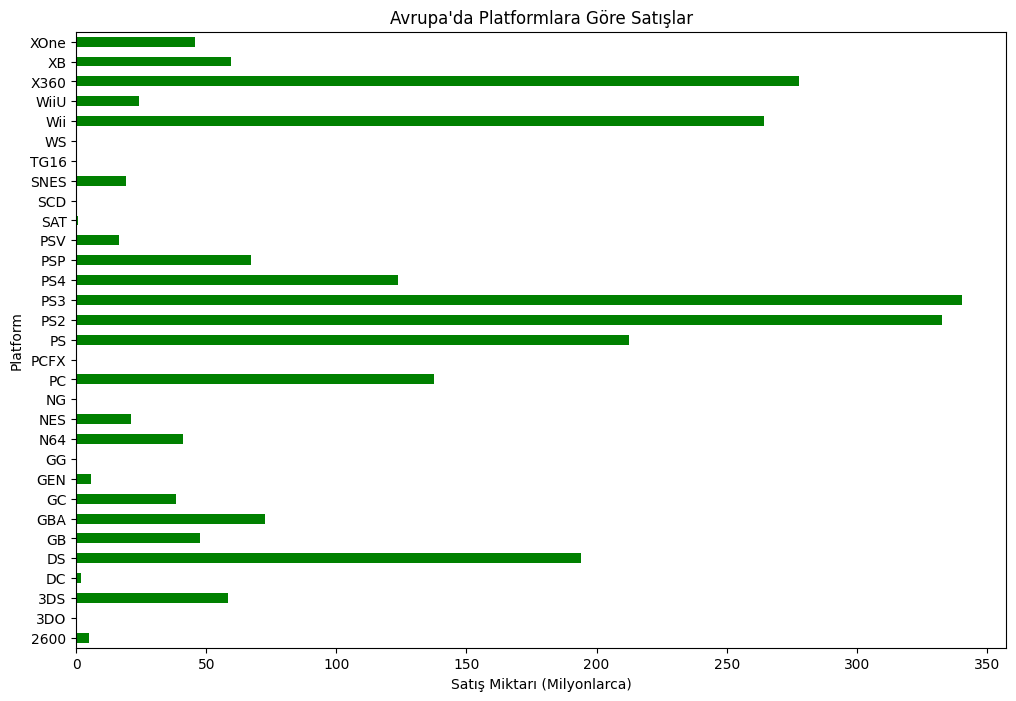

In [46]:
eu_platform_sales.plot(kind='barh',color='green', figsize=(12, 8))
plt.title('Avrupa\'da Platformlara Göre Satışlar')
plt.xlabel('Satış Miktarı (Milyonlarca)')
plt.ylabel('Platform')
plt.show()

In [47]:
jp_platform_sales = df.groupby('Platform')['JP_Sales'].sum()

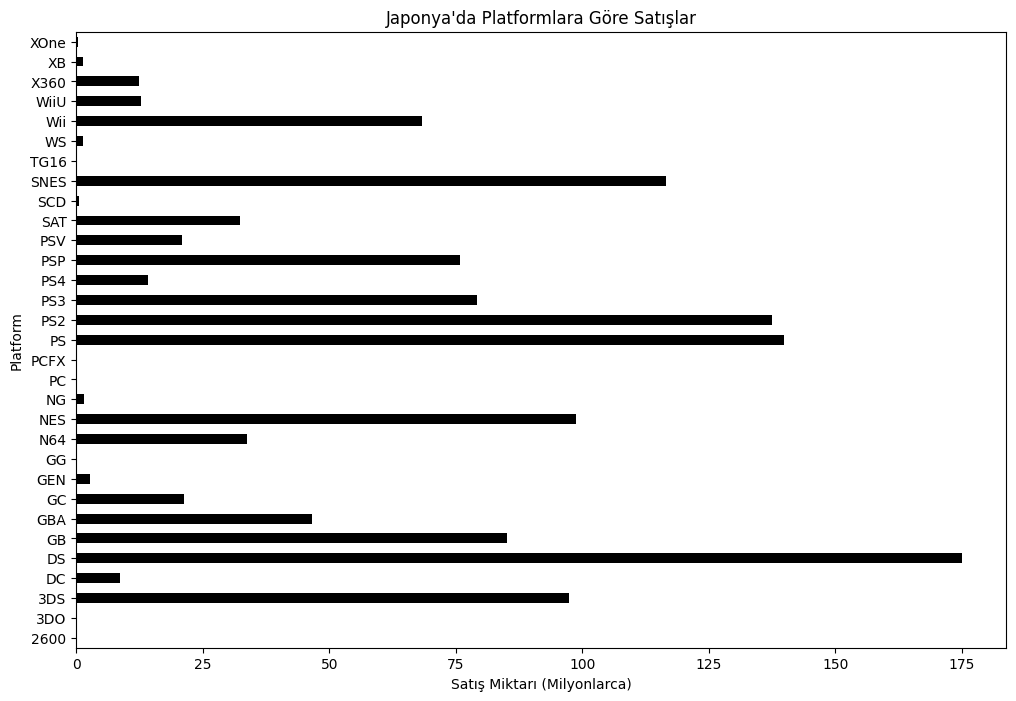

In [48]:
jp_platform_sales.plot(kind='barh',color='black', figsize=(12, 8))
plt.title('Japonya\'da Platformlara Göre Satışlar')
plt.xlabel('Satış Miktarı (Milyonlarca)')
plt.ylabel('Platform')
plt.show()

In [49]:
other_platform_sales = df.groupby('Platform')['Other_Sales'].sum()

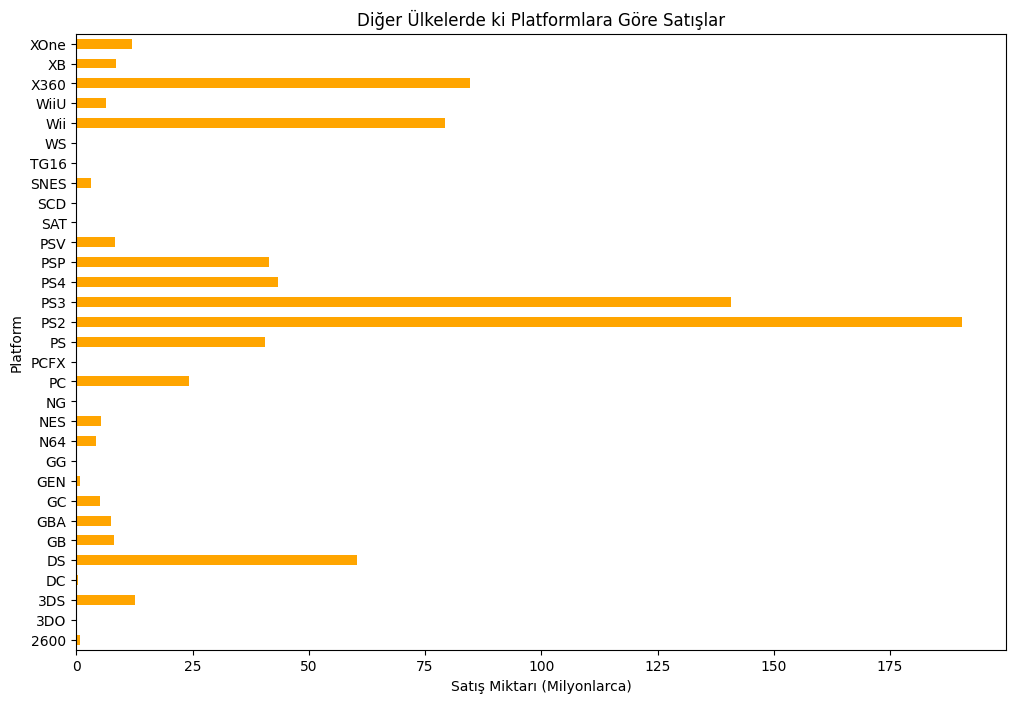

In [50]:
other_platform_sales.plot(kind='barh',color='orange', figsize=(12, 8))
plt.title('Diğer Ülkelerde ki Platformlara Göre Satışlar')
plt.xlabel('Satış Miktarı (Milyonlarca)')
plt.ylabel('Platform')
plt.show()

In [54]:
#Hangi Yıllarda En çok oyun Çıkmıştır
df['Year'].value_counts().head()

Year
2009    1433
2008    1428
2010    1257
2007    1201
2011    1136
Name: count, dtype: int64

In [55]:
#Hangi Yıllarda En Az Oyun Çıkmıştır
df['Year'].value_counts().tail()

Year
1990    16
1988    15
1984    14
1985    14
1980     9
Name: count, dtype: int64

Text(0, 0.5, 'Sales')

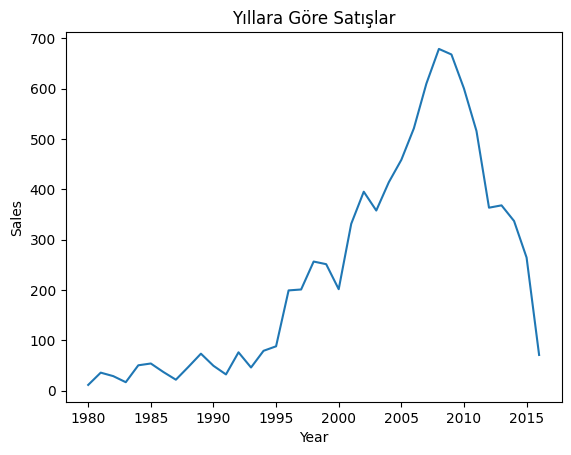

In [56]:
sns.lineplot(y=sales_per_year,x=sales_per_year.index)
plt.title("Yıllara Göre Satışlar")
plt.ylabel("Sales")

In [57]:
columns_to_drop = [ 'Other_Sales']
df_dropped = df.drop(columns=columns_to_drop)

C:\Users\TR\AppData\Local\Temp\ipykernel_14188\2965777895.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data=games_melted, palette='rocket', showfliers=False, legend=False)


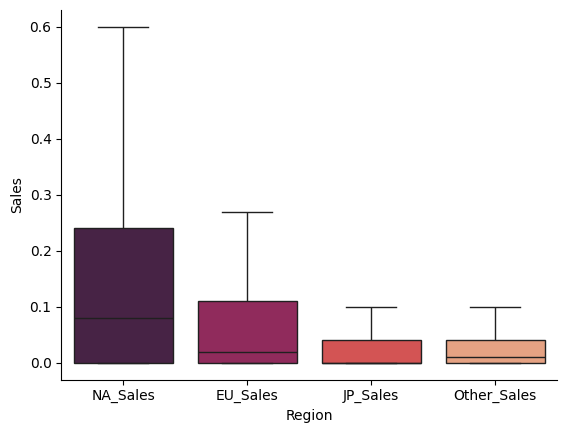

In [58]:
games_melted = pd.melt(df, 
                       id_vars=['Name',"Year"], 
                       value_vars=['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales'], 
                       var_name='Region', 
                       value_name='Sales')

sns.boxplot(x='Region', y='Sales', data=games_melted, palette='rocket', showfliers=False, legend=False)
sns.despine()
plt.show()


In [59]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_by_year = df.groupby('Year')[sales_columns].sum().reset_index()

In [60]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

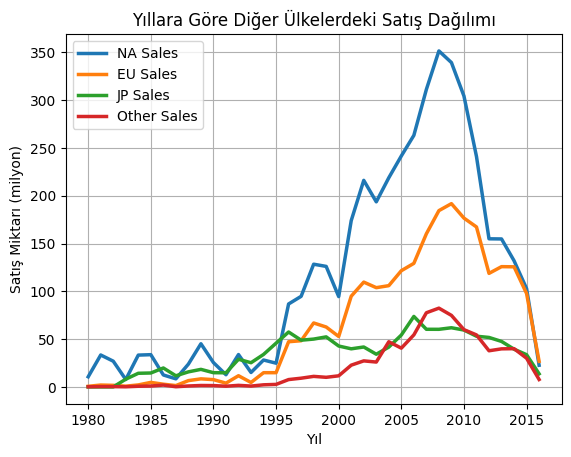

In [61]:
sns.lineplot(data=sales_by_year, x='Year', y='NA_Sales', label='NA Sales', linewidth=2.5)
sns.lineplot(data=sales_by_year, x='Year', y='EU_Sales', label='EU Sales', linewidth=2.5)
sns.lineplot(data=sales_by_year, x='Year', y='JP_Sales', label='JP Sales', linewidth=2.5)
sns.lineplot(data=sales_by_year, x='Year', y='Other_Sales', label='Other Sales', linewidth=2.5)

plt.title('Yıllara Göre Diğer Ülkelerdeki Satış Dağılımı')
plt.xlabel('Yıl')
plt.ylabel('Satış Miktarı (milyon)')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
non_numeric_columns = df.select_dtypes(include=['object']).columns

In [63]:
df_numeric = df.drop(columns=non_numeric_columns)

In [64]:
correlation_matrix = df_numeric.corr()

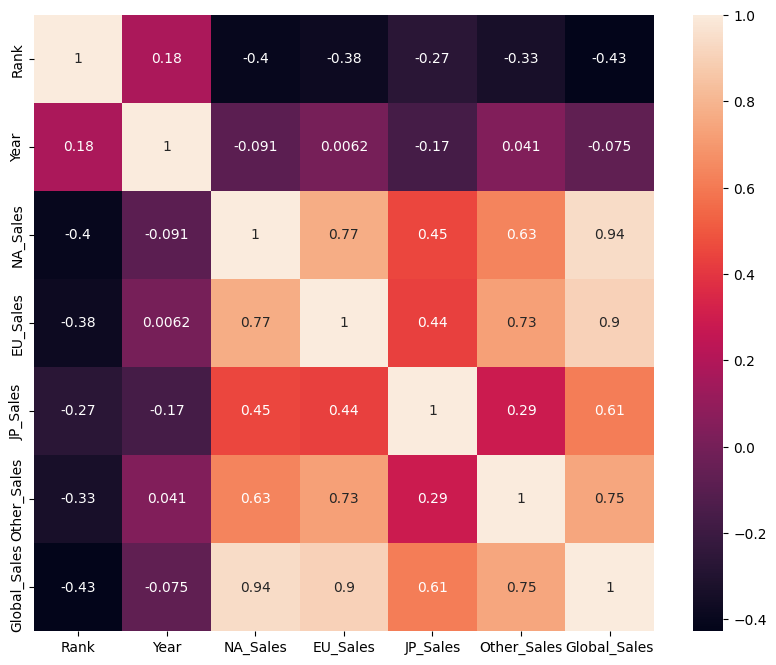

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

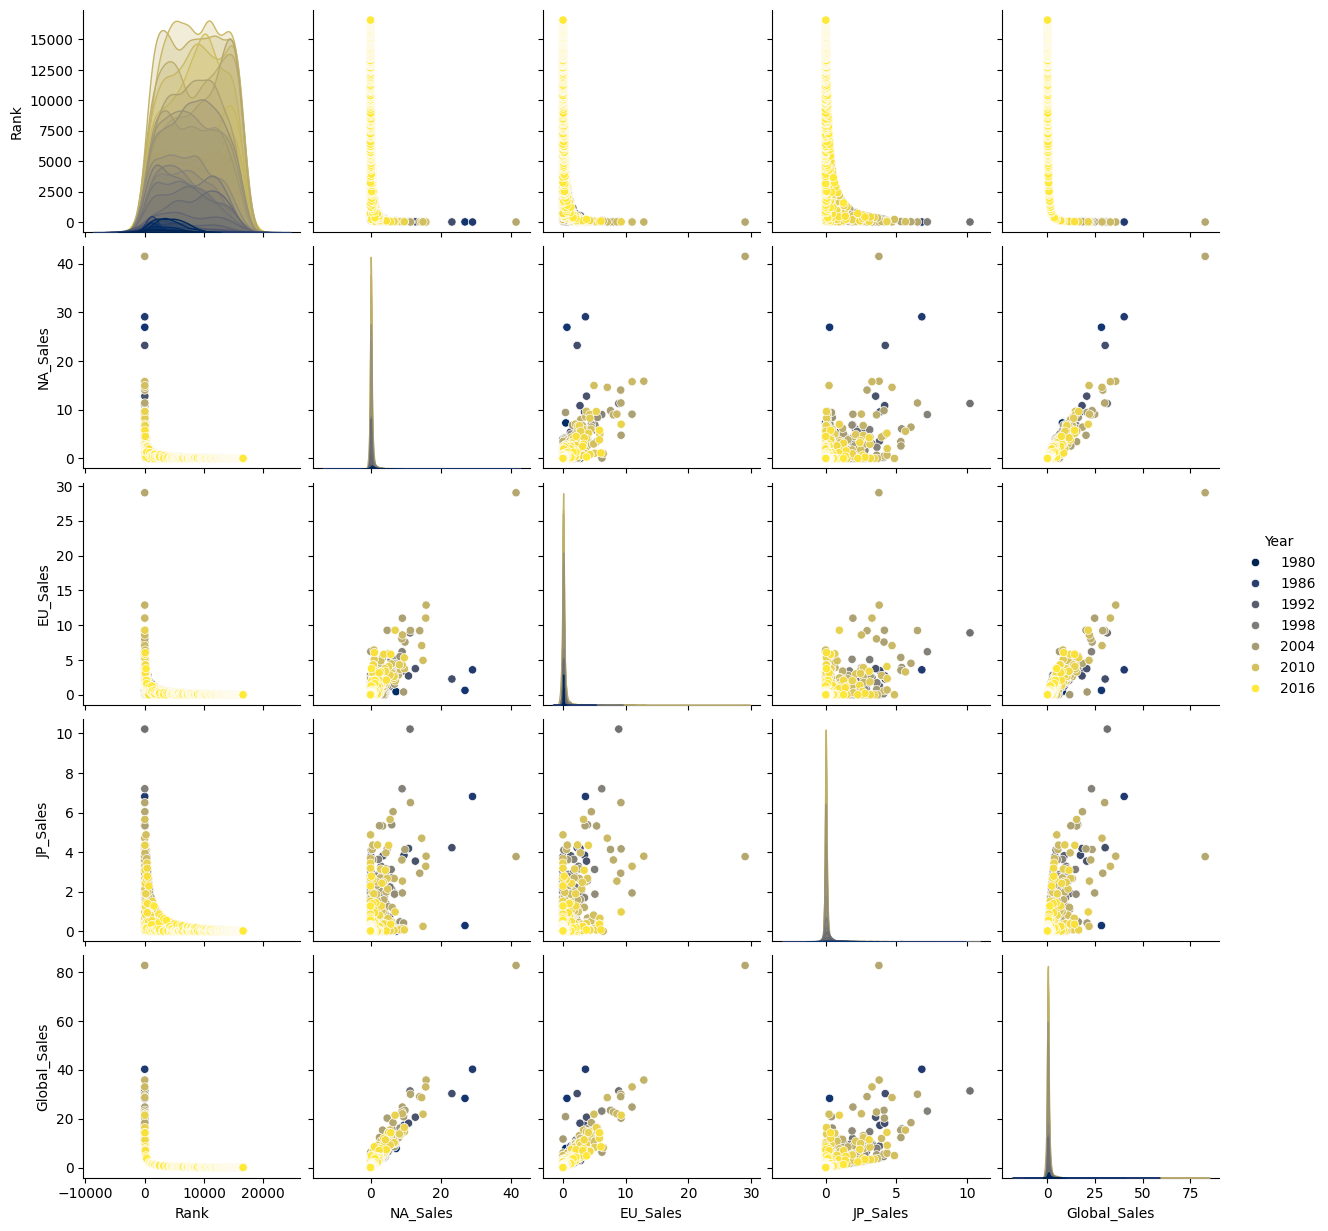

In [66]:
sns.pairplot(df_dropped, hue='Year', palette='cividis')